# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

# Reading Data and converting to Data Frame

In [16]:
data=pd.read_csv(r"D:\Desktop\projects\ML_project\vaers.csv")
data_f=pd.DataFrame(data)
data_f

C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\2898973526.py:1: DtypeWarning: Columns (14,19,22,30,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"D:\Desktop\projects\ML_project\vaers.csv")


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,...,Kidney,Hyperlipidemia,CVD,AF,othermeds,currill,allergies,sex,disable,manu
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,...,0,0,0,0,1,1,1,1,0,0
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,...,0,0,0,0,1,1,1,1,0,0
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,...,0,0,0,0,1,1,1,1,0,1
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,...,0,0,0,0,1,1,1,1,0,0
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150390,918437,COVID19,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),12/31/2020,AR,...,0,0,0,0,0,0,0,1,0,1
150391,918439,COVID19,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),12/31/2020,AR,...,0,0,0,0,0,0,0,1,0,1
150392,918441,COVID19,MODERNA,025J20-2A,1,IM,RA,COVID19 (COVID19 (MODERNA)),12/31/2020,NE,...,0,0,0,0,1,1,1,1,0,0
150393,918503,COVID19,MODERNA,039K20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),12/31/2020,RI,...,0,0,0,0,1,1,1,1,0,0


# Data Preprocessing

In [17]:
data_f.keys()

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS',
       'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED',
       'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY',
       'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA',
       'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'date',
       'date.vax', 'dur', 'Allergic_his', 'diabetes', 'hypertension',
       'arthritis', 'Asthma', 'Migraine', 'copd', 'Anxiety', 'obesity',
       'depression', 'Thyroid', 'Anemia', 'Dementia', 'Cancer', 'Kidney',
       'Hyperlipidemia', 'CVD', 'AF', 'o

In [18]:
data_n=data_f[['AGE_YRS','SEX','VAX_MANU','OTHER_MEDS', 'CUR_ILL','DISABLE', 'ALLERGIES','Anxiety', 'obesity',
       'depression', 'Thyroid', 'Anemia', 'Dementia', 'Cancer', 'Kidney',
       'Hyperlipidemia', 'CVD', 'AF', 'NUMDAYS']]
data_n

,AGE_YRS,SEX,VAX_MANU,OTHER_MEDS,CUR_ILL,DISABLE,ALLERGIES,Anxiety,obesity,depression,Thyroid,Anemia,Dementia,Cancer,Kidney,Hyperlipidemia,CVD,AF,NUMDAYS
0,33.0,F,MODERNA,None,None,NaN,Pcn and bee venom,0,0,0,0,0,0,0,0,0,0,0,2
1,73.0,F,MODERNA,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy""",0,0,0,0,0,0,0,0,0,0,0,0
2,23.0,F,PFIZER\BIONTECH,None,None,NaN,Shellfish,0,0,0,0,0,0,0,0,0,0,0,0
3,58.0,F,MODERNA,none,kidney infection,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,0,0,0,0,0,0,0,0,0,0,0
4,47.0,F,MODERNA,Na,Na,NaN,Na,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150390,NaN,F,UNKNOWN MANUFACTURER,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
150391,NaN,F,UNKNOWN MANUFACTURER,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
150392,35.0,F,MODERNA,None,None,NaN,None,0,0,0,0,0,0,0,0,0,0,0,7
150393,50.0,F,MODERNA,"Ibuprofen 800 mg, Birth Control",None,NaN,"PCN, Prednisone, Bleach",0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data_n.drop(data_n[data_n['SEX'] == 'U'].index, inplace = True)
data_n.drop(data_n[data_n['VAX_MANU'] == 'UNKNOWN MANUFACTURER'].index, inplace = True)
data_n.drop(data_n[data_n['AGE_YRS'] <12].index, inplace = True)

data_n

C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\509643665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.drop(data_n[data_n['SEX'] == 'U'].index, inplace = True)
C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\509643665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.drop(data_n[data_n['VAX_MANU'] == 'UNKNOWN MANUFACTURER'].index, inplace = True)
C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\509643665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,AGE_YRS,SEX,VAX_MANU,OTHER_MEDS,CUR_ILL,DISABLE,ALLERGIES,Anxiety,obesity,depression,Thyroid,Anemia,Dementia,Cancer,Kidney,Hyperlipidemia,CVD,AF,NUMDAYS
0,33.0,F,MODERNA,None,None,NaN,Pcn and bee venom,0,0,0,0,0,0,0,0,0,0,0,2
1,73.0,F,MODERNA,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy""",0,0,0,0,0,0,0,0,0,0,0,0
2,23.0,F,PFIZER\BIONTECH,None,None,NaN,Shellfish,0,0,0,0,0,0,0,0,0,0,0,0
3,58.0,F,MODERNA,none,kidney infection,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,0,0,0,0,0,0,0,0,0,0,0
4,47.0,F,MODERNA,Na,Na,NaN,Na,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150383,47.0,F,PFIZER\BIONTECH,Complete vitamins biotin tramadol,None,NaN,None,0,0,0,0,0,0,0,0,0,0,0,0
150385,39.0,F,MODERNA,None known,None known,NaN,None known,0,0,0,0,0,0,0,0,0,0,0,1
150392,35.0,F,MODERNA,None,None,NaN,None,0,0,0,0,0,0,0,0,0,0,0,7
150393,50.0,F,MODERNA,"Ibuprofen 800 mg, Birth Control",None,NaN,"PCN, Prednisone, Bleach",0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data_n.isnull().sum(axis = 0)

AGE_YRS             2972
SEX                    0
VAX_MANU               0
OTHER_MEDS         40970
CUR_ILL            61558
DISABLE           144744
ALLERGIES          45380
Anxiety                0
obesity                0
depression             0
Thyroid                0
Anemia                 0
Dementia               0
Cancer                 0
Kidney                 0
Hyperlipidemia         0
CVD                    0
AF                     0
NUMDAYS                0
dtype: int64

In [20]:
data_n.drop(["DISABLE", "CUR_ILL"], axis = 1, inplace = True)
data_n

C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\2646908419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.drop(["DISABLE", "CUR_ILL"], axis = 1, inplace = True)


,AGE_YRS,SEX,VAX_MANU,OTHER_MEDS,ALLERGIES,Anxiety,obesity,depression,Thyroid,Anemia,Dementia,Cancer,Kidney,Hyperlipidemia,CVD,AF,NUMDAYS
0,33.0,F,MODERNA,None,Pcn and bee venom,0,0,0,0,0,0,0,0,0,0,0,2
1,73.0,F,MODERNA,Patient residing at nursing facility. See pati...,"""Dairy""",0,0,0,0,0,0,0,0,0,0,0,0
2,23.0,F,PFIZER\BIONTECH,None,Shellfish,0,0,0,0,0,0,0,0,0,0,0,0
3,58.0,F,MODERNA,none,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,0,0,0,0,0,0,0,0,0,0,0
4,47.0,F,MODERNA,Na,Na,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150383,47.0,F,PFIZER\BIONTECH,Complete vitamins biotin tramadol,None,0,0,0,0,0,0,0,0,0,0,0,0
150385,39.0,F,MODERNA,None known,None known,0,0,0,0,0,0,0,0,0,0,0,1
150392,35.0,F,MODERNA,None,None,0,0,0,0,0,0,0,0,0,0,0,7
150393,50.0,F,MODERNA,"Ibuprofen 800 mg, Birth Control","PCN, Prednisone, Bleach",0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
data_n.fillna(0,inplace=True)
data_n

C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\2133437383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.fillna(0,inplace=True)


,AGE_YRS,SEX,VAX_MANU,OTHER_MEDS,ALLERGIES,Anxiety,obesity,depression,Thyroid,Anemia,Dementia,Cancer,Kidney,Hyperlipidemia,CVD,AF,NUMDAYS
0,33.0,F,MODERNA,None,Pcn and bee venom,0,0,0,0,0,0,0,0,0,0,0,2
1,73.0,F,MODERNA,Patient residing at nursing facility. See pati...,"""Dairy""",0,0,0,0,0,0,0,0,0,0,0,0
2,23.0,F,PFIZER\BIONTECH,None,Shellfish,0,0,0,0,0,0,0,0,0,0,0,0
3,58.0,F,MODERNA,none,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,0,0,0,0,0,0,0,0,0,0,0
4,47.0,F,MODERNA,Na,Na,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150383,47.0,F,PFIZER\BIONTECH,Complete vitamins biotin tramadol,None,0,0,0,0,0,0,0,0,0,0,0,0
150385,39.0,F,MODERNA,None known,None known,0,0,0,0,0,0,0,0,0,0,0,1
150392,35.0,F,MODERNA,None,None,0,0,0,0,0,0,0,0,0,0,0,7
150393,50.0,F,MODERNA,"Ibuprofen 800 mg, Birth Control","PCN, Prednisone, Bleach",0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
data_n.drop(["VAX_MANU", "OTHER_MEDS", "ALLERGIES"], axis = 1, inplace = True)
data_n

C:\Users\SHREE\AppData\Local\Temp\ipykernel_6824\2462535534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.drop(["VAX_MANU", "OTHER_MEDS", "ALLERGIES"], axis = 1, inplace = True)


,AGE_YRS,SEX,Anxiety,obesity,depression,Thyroid,Anemia,Dementia,Cancer,Kidney,Hyperlipidemia,CVD,AF,NUMDAYS
0,33.0,F,0,0,0,0,0,0,0,0,0,0,0,2
1,73.0,F,0,0,0,0,0,0,0,0,0,0,0,0
2,23.0,F,0,0,0,0,0,0,0,0,0,0,0,0
3,58.0,F,0,0,0,0,0,0,0,0,0,0,0,0
4,47.0,F,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150383,47.0,F,0,0,0,0,0,0,0,0,0,0,0,0
150385,39.0,F,0,0,0,0,0,0,0,0,0,0,0,1
150392,35.0,F,0,0,0,0,0,0,0,0,0,0,0,7
150393,50.0,F,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
enc_data= pd.get_dummies(data_n, columns = ['SEX'])
print(enc_data.keys())

Index(['AGE_YRS', 'Anxiety', 'obesity', 'depression', 'Thyroid', 'Anemia',
       'Dementia', 'Cancer', 'Kidney', 'Hyperlipidemia', 'CVD', 'AF',
       'NUMDAYS', 'SEX_F', 'SEX_M'],
      dtype='object')


# correlation matrix

<AxesSubplot:>

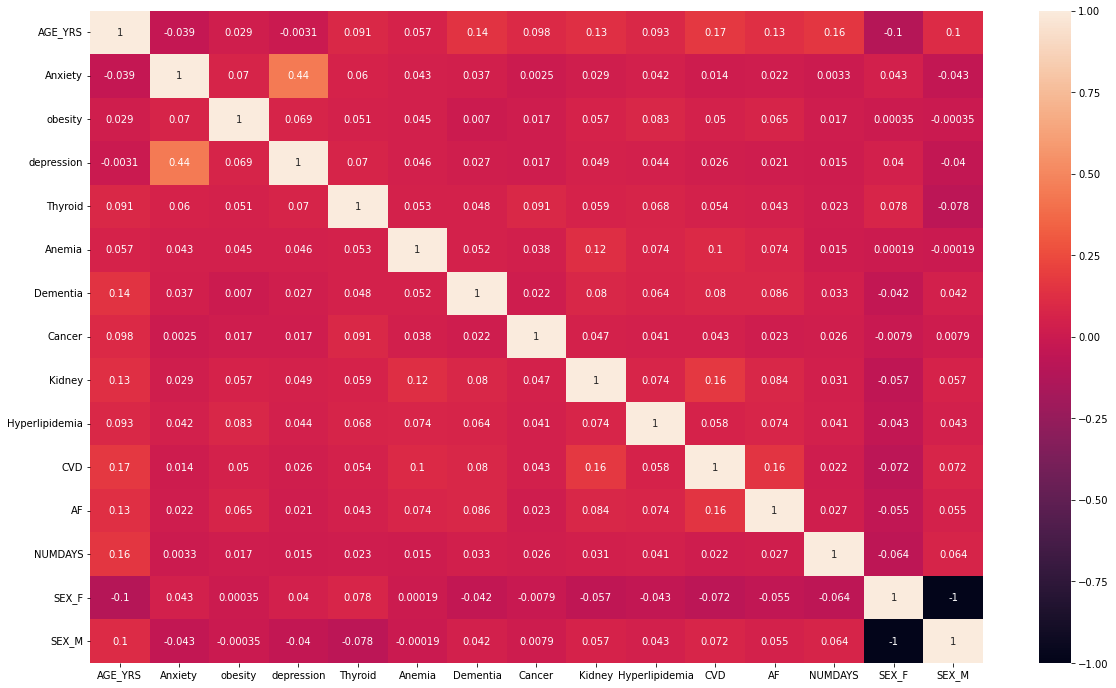

In [27]:
cor=enc_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True)

In [46]:
X=enc_data[['AGE_YRS','Dementia', 'Cancer', 'Kidney', 'Hyperlipidemia', 'CVD', 'AF', 'SEX_M']].values
Y=enc_data['NUMDAYS'].values
X=(X-X.min())/(X.max()-X.min())

In [47]:
X

array([[0.27731092, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61344538, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.19327731, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42016807, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79831933, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
Y

array([[2],
       [0],
       [0],
       ...,
       [7],
       [0],
       [8]], dtype=int64)

# splitting data in training and testing set

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

# Linear Regression

In [39]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = regr.predict(X_test)
y_pred

array([2.80676218, 1.8199141 , 3.75758599, ..., 1.54954128, 1.36929273,
       2.49584615])

In [41]:
pdf=pd.DataFrame({'actual':y_test,'predicted':y_pred})
pdf

,actual,predicted
0,0,2.806762
1,0,1.819914
2,0,3.757586
3,1,1.729790
4,7,1.910038
...,...,...
29535,0,1.729790
29536,0,3.032073
29537,2,1.549541
29538,0,1.369293


In [42]:
y_pred_1= regr.predict(X_train)
y_pred_1



array([2.22547333, 2.76170004, 2.72115684, ..., 1.50447914, 3.44215103,
       2.00016265])

In [43]:
LR_train=[]
LR_train.append(mean_squared_error(y_train,y_pred_1))
LR_train.append(sqrt(mean_squared_error(y_train,y_pred_1)))
LR_train.append(mae(y_train,y_pred_1))
LR_train

[28.150612169135798, 5.3057150478645, 3.2170990524944036]

In [44]:
LR_test=[]
LR_test.append(mean_squared_error(y_test,y_pred))
LR_test.append(sqrt(mean_squared_error(y_test,y_pred)))
LR_test.append(mae(y_test,y_pred))
LR_test

[28.207912936261387, 5.3111122127348604, 3.2216682597313806]

In [45]:
da={'Training':LR_train, 'Testing':LR_test}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,28.150612,28.207913
RMSE,5.305715,5.311112
MAE,3.217099,3.221668


# Random Forest

In [72]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 


RandomForestRegressor(random_state=0)

In [73]:
predict_test_1 = regressor.predict(X_test)
predict_test_1

array([2.0292566 , 1.02154766, 4.74719388, ..., 1.66021984, 1.52627168,
       2.11846213])

In [74]:
pdf2=pd.DataFrame({'actual':y_test,'predicted':predict_test_1})
pdf2

,actual,predicted
0,0,2.029257
1,0,1.021548
2,0,4.747194
3,1,1.830744
4,7,2.106612
...,...,...
29535,0,1.830744
29536,0,2.137696
29537,2,1.660220
29538,0,1.526272


In [75]:
y_pred_2= regressor.predict(X_train)
y_pred_2

array([2.0292566 , 1.97980962, 2.55640538, ..., 1.67070606, 4.17190991,
       1.99938374])

In [76]:
RF_train=[]
RF_train.append(mean_squared_error(y_train,y_pred_2))
RF_train.append(sqrt(mean_squared_error(y_train,y_pred_2)))
RF_train.append(mae(y_train,y_pred_2))
RF_train

[25.735502236645573, 5.073017074349895, 3.030621130491908]

In [77]:
RF_test=[]
RF_test.append(mean_squared_error(y_test,predict_test_1))
RF_test.append(sqrt(mean_squared_error(y_test,predict_test_1)))
RF_test.append(mae(y_test,predict_test_1))
RF_test

[27.159795076636907, 5.21150602768882, 3.119266494716617]

In [79]:
da={'Training':RF_train , 'Testing':RF_test}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,25.735502,27.159795
RMSE,5.073017,5.211506
MAE,3.030621,3.119266


# OLS

In [80]:
# adding the constant term
x = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
result = sm.OLS(y_train, x).fit()

In [81]:
x1 = sm.add_constant(X_test)
predict_test_2=result.predict(x1)
predict_test_2

array([2.32993447, 2.23053933, 3.89954129, ..., 1.63746088, 1.45280125,
       2.60692391])

In [82]:
pdf3=pd.DataFrame({'actual':y_test,'predicted':predict_test_2})
pdf3

,actual,predicted
0,0,2.329934
1,0,2.230539
2,0,3.899541
3,1,1.822121
4,7,2.006780
...,...,...
29535,0,1.822121
29536,0,2.560759
29537,2,1.637461
29538,0,1.452801


In [83]:
x2 = sm.add_constant(X_train)
y_pred_3= result.predict(x2)
y_pred_3

array([2.32993447, 2.28376957, 2.83774844, ..., 1.59129597, 3.57638695,
       2.09910994])

In [84]:
OLS_train=[]
OLS_train.append(mean_squared_error(y_train,y_pred_3))
OLS_train.append(sqrt(mean_squared_error(y_train,y_pred_3)))
OLS_train.append(mae(y_train,y_pred_3))
OLS_train

[28.20237378595107, 5.310590719115066, 3.2175889745403783]

In [85]:
OLS_test=[]
OLS_test.append(mean_squared_error(y_test,predict_test_2))
OLS_test.append(sqrt(mean_squared_error(y_test,predict_test_2)))
OLS_test.append(mae(y_test,predict_test_2))
OLS_test

[28.274500766005755, 5.317377245034036, 3.222638007822742]

In [86]:
da={'Training':OLS_train, 'Testing':OLS_test}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,28.202374,28.274501
RMSE,5.310591,5.317377
MAE,3.217589,3.222638


# Ridge

In [87]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [88]:
pred_test_3= rr.predict(X_test)
pred_test_3

array([2.33150768, 2.21960227, 3.90589054, ..., 1.63692701, 1.4517055 ,
       2.60933995])

In [89]:
pdf4=pd.DataFrame({'actual':y_test,'predicted':pred_test_3})
pdf4

,actual,predicted
0,0,2.331508
1,0,2.219602
2,0,3.905891
3,1,1.822149
4,7,2.007370
...,...,...
29535,0,1.822149
29536,0,2.563035
29537,2,1.636927
29538,0,1.451705


In [90]:
y_pred_4= rr.predict(X_train)
y_pred_4

array([2.33150768, 2.28520231, 2.84086684, ..., 1.59062163, 3.58175289,
       2.09998079])

In [91]:
Ridge_train=[]
Ridge_train.append(mean_squared_error(y_train,y_pred_4))
Ridge_train.append(sqrt(mean_squared_error(y_train,y_pred_4)))
Ridge_train.append(mae(y_train,y_pred_4))
Ridge_train

[28.20268647812378, 5.310620159465727, 3.217762042536351]

In [92]:
Ridge_test=[]
Ridge_test.append(mean_squared_error(y_test,pred_test_3))
Ridge_test.append(sqrt(mean_squared_error(y_test,pred_test_3)))
Ridge_test.append(mae(y_test,pred_test_3))
Ridge_test

[28.274894027957924, 5.3174142238458275, 3.222765614983167]

In [93]:
da={'Training':Ridge_train, 'Testing':Ridge_test}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,28.202686,28.274894
RMSE,5.310620,5.317414
MAE,3.217762,3.222766


# Polynomial Regression


In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_reg=poly.fit_transform(X_train)
poly_reg

array([[1.        , 0.36134454, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.35294118, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.45378151, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.22689076, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.58823529, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.31932773, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_reg_1=poly.fit_transform(X_test)
poly_reg_1

array([[1.        , 0.36134454, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.28571429, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.64705882, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.23529412, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.20168067, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.41176471, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [96]:
regr = LinearRegression()
  
regr.fit(poly_reg, y_train)


LinearRegression()

In [97]:
y_pred = regr.predict(poly_reg_1)
y_pred

array([1.90983976, 2.5728341 , 4.60300165, ..., 1.72755077, 1.78294876,
       2.15519033])

In [98]:
pdf=pd.DataFrame({'actual':y_test,'predicted':y_pred})
pdf

,actual,predicted
0,0,1.909840
1,0,2.572834
2,0,4.603002
3,1,1.715946
4,7,1.748134
...,...,...
29535,0,1.715946
29536,0,2.107456
29537,2,1.727551
29538,0,1.782949


In [99]:
y_pred_1= regr.predict(poly_reg)
y_pred_1


array([1.90983976, 1.87852772, 2.43491837, ..., 1.73729467, 3.78987469,
       1.78065019])

In [100]:
PR_train=[]

PR_train.append(mean_squared_error(y_train,y_pred_1))
PR_train.append(sqrt(mean_squared_error(y_train,y_pred_1)))
PR_train.append(mae(y_train,y_pred_1))
PR_train

[27.705310740120012, 5.263583450475542, 3.184392357567437]

In [101]:
PR_test=[]
PR_test.append(mean_squared_error(y_test,y_pred))
PR_test.append(sqrt(mean_squared_error(y_test,y_pred)))
PR_test.append(mae(y_test,y_pred))
PR_test

[27.84643748668375, 5.276972378806217, 3.198496222817251]

In [102]:
da={'Training':PR_train, 'Testing':PR_test}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,27.705311,27.846437
RMSE,5.263583,5.276972
MAE,3.184392,3.198496


# Comapring all Models

In [103]:
da={'LR':LR_test, 'OLS':OLS_test, 'Ridge':Ridge_test ,'PR':PR_test ,'RF':RF_test}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,LR,OLS,Ridge,PR,RF
MSE,28.274501,28.274501,28.274894,27.846437,27.159795
RMSE,5.317377,5.317377,5.317414,5.276972,5.211506
MAE,3.222638,3.222638,3.222766,3.198496,3.119266
